In [1]:
# import statements 

import os 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set options

In [2]:
pd.options.display.max_rows=None

pd.options.display.max_columns=None

plt.rcParams['figure.figsize']=[15,8]

# Loading the Data

In [3]:
dfInput=pd.read_csv(os.getcwd()+'/healthcare-dataset-stroke-data.csv')

dfInput.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


id will not help us in model building .so we an remove the id

In [4]:
# removing the column 

print('The shape before removing id : ',dfInput.shape)
dfInput.drop('id',axis=1,inplace=True)
print('The shape after removing id : ',dfInput.shape)

The shape before removing id :  (5110, 12)
The shape after removing id :  (5110, 11)


In [42]:
dfInput.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

# checking datatypes 

In [5]:
dfInput.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


Conclusion :- we can find that 'hypertension' ,'heart_disease' and 'stroke' are categorical variables but the datatype for these is int. So we need to convert into object datatype.

In [6]:
# changing the datatype

cols=['hypertension','heart_disease','stroke']

for colname in cols:
    dfInput[colname]=dfInput[colname].astype('object')

print('The dataframe info after changing Datatype :')

print(dfInput.info())

The dataframe info after changing Datatype :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   object 
 3   heart_disease      5110 non-null   object 
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   object 
dtypes: float64(3), object(8)
memory usage: 439.3+ KB
None


In [7]:
# separating the categorical values and numeric values

dfCategorical=dfInput.select_dtypes(exclude=np.number)

dfNumeric=dfInput.select_dtypes(include=np.number)

print('The shape of numeric dataframe : ',dfNumeric.shape)
print('The shape of categorical dataframe : ',dfCategorical.shape)

The shape of numeric dataframe :  (5110, 3)
The shape of categorical dataframe :  (5110, 8)


# Summary Statistics

In [8]:
dfCategorical.describe().transpose()

,count,unique,top,freq
gender,5110,3,Female,2994
hypertension,5110,2,0,4612
heart_disease,5110,2,0,4834
ever_married,5110,2,Yes,3353
work_type,5110,5,Private,2925
Residence_type,5110,2,Urban,2596
smoking_status,5110,4,never smoked,1892
stroke,5110,2,0,4861


In [9]:
dfNumeric.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60


Conclusion :- we can find a lot of null values in the bmi column.

# Missing Value Treatment

In [10]:

def MissingValues(data):
    
    nullValuesCount=data.isnull().sum().sort_values(ascending =False)
    
    nullValuePercentage=((data.isnull().sum()*100)/data.isnull().count()).sort_values(ascending =False)
    
    dfMissingValues=pd.concat([nullValuesCount,nullValuePercentage],axis=1,keys=['Count','Percentage'])
    
    return dfMissingValues

# Numeric values
print(MissingValues(dfNumeric))

# categorical Values
print(MissingValues(dfCategorical))

                   Count  Percentage
bmi                  201    3.933464
avg_glucose_level      0    0.000000
age                    0    0.000000
                Count  Percentage
stroke              0         0.0
smoking_status      0         0.0
Residence_type      0         0.0
work_type           0         0.0
ever_married        0         0.0
heart_disease       0         0.0
hypertension        0         0.0
gender              0         0.0


In [11]:
# Determine the average weight per item:
#AverageBmi = dfInput.pivot_table(values='bmi', index=['age','gender'])

AverageBmi = dfNumeric.pivot_table(values='bmi', index=['age'])
AverageBmi

,bmi
age,
0.08,15.500000
0.16,14.766667
0.24,17.400000
0.32,18.080000
0.40,15.850000
0.48,16.100000
0.56,18.860000
0.64,18.925000
0.72,19.240000


In [12]:
# function to extract bmi for corresponding age
def imputeBmi(cols):
    bmi = cols[0]
    age = cols[1]
    #gender=cols[2]
    
    
    if pd.isnull(bmi):
        
        return  AverageBmi['bmi'][ (AverageBmi.index == age) ] 
        
    else:
        return bmi

# updating the nan values in bmi with the average bmi values according to age

dfNumeric['bmi'] = dfNumeric[['bmi','age']].apply(imputeBmi,axis=1).astype(float)

<ipython-input-12-4e4b1f80a429>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNumeric['bmi'] = dfNumeric[['bmi','age']].apply(imputeBmi,axis=1).astype(float)


In [13]:
# rechecking  the null value counts

MissingValues(dfNumeric)

,Count,Percentage
bmi,0,0.0
avg_glucose_level,0,0.0
age,0,0.0


# Variable Distribution 

# Numeric Data

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

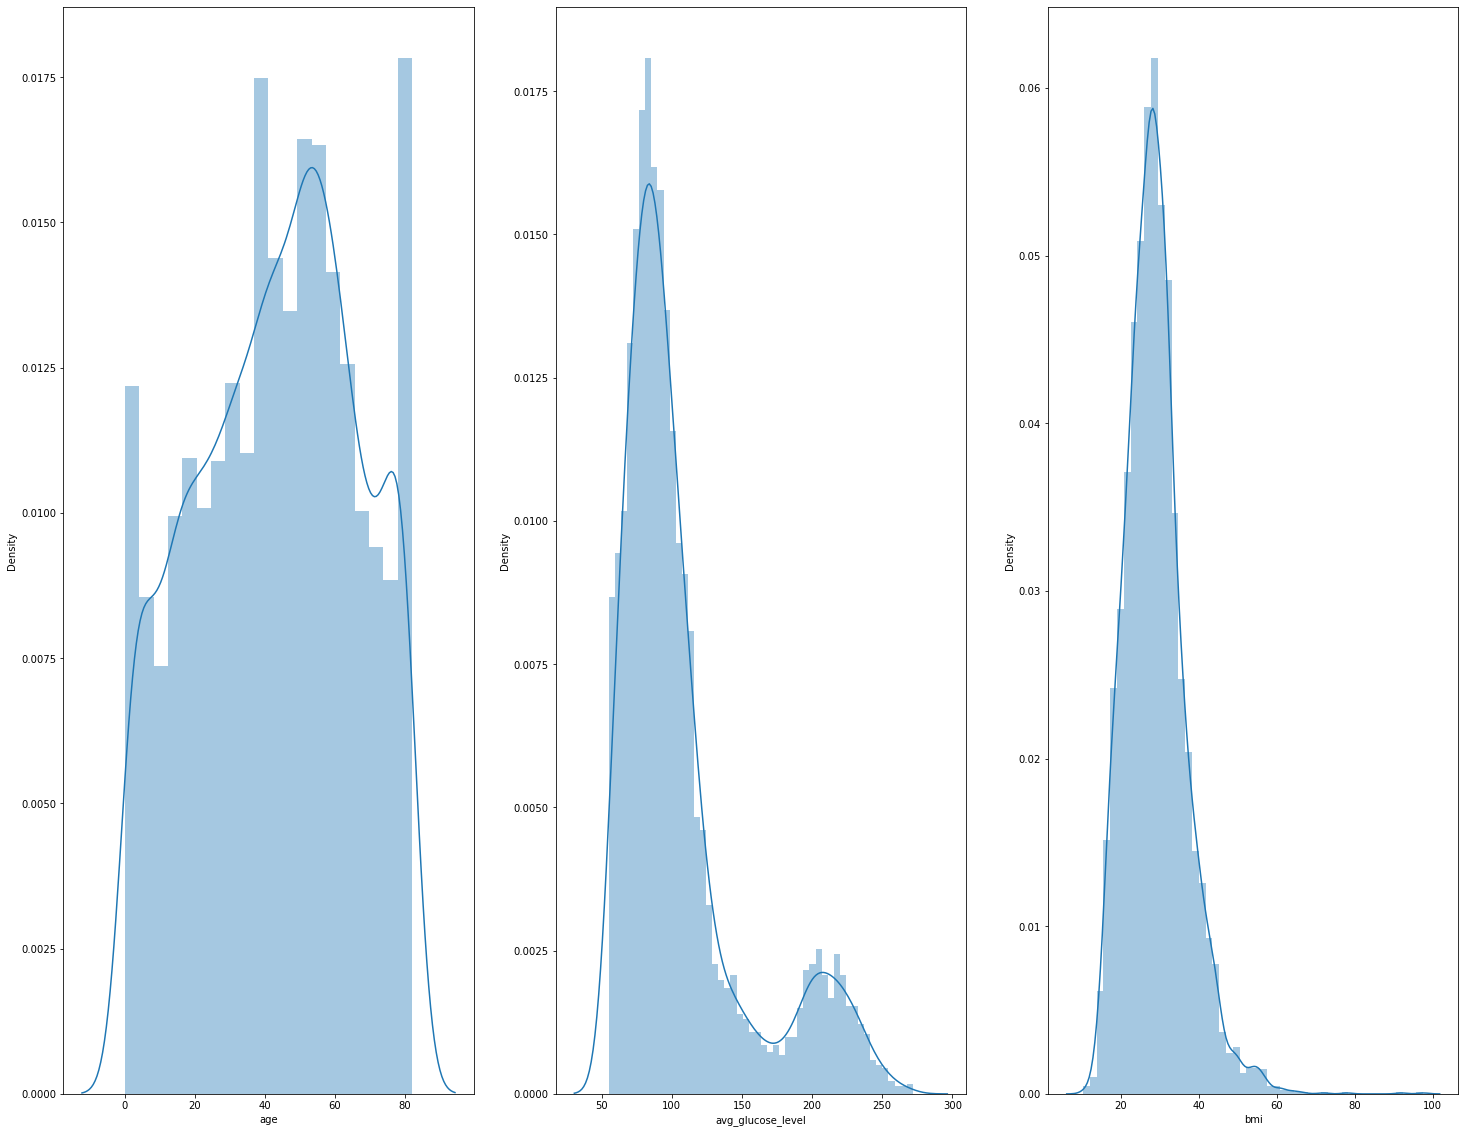

In [14]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(25, 20))


for variable,subplot in zip(dfNumeric,ax.flatten()):
    
    sns.distplot(dfNumeric[variable],kde=True,ax=subplot)

Conclusion :- The columns 'avg_glucose_level' and 'bmi' has right skewness.

# Categorical Data

The shape before altering :  (5110, 8)
The shape after altering :  (5110, 7)


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\

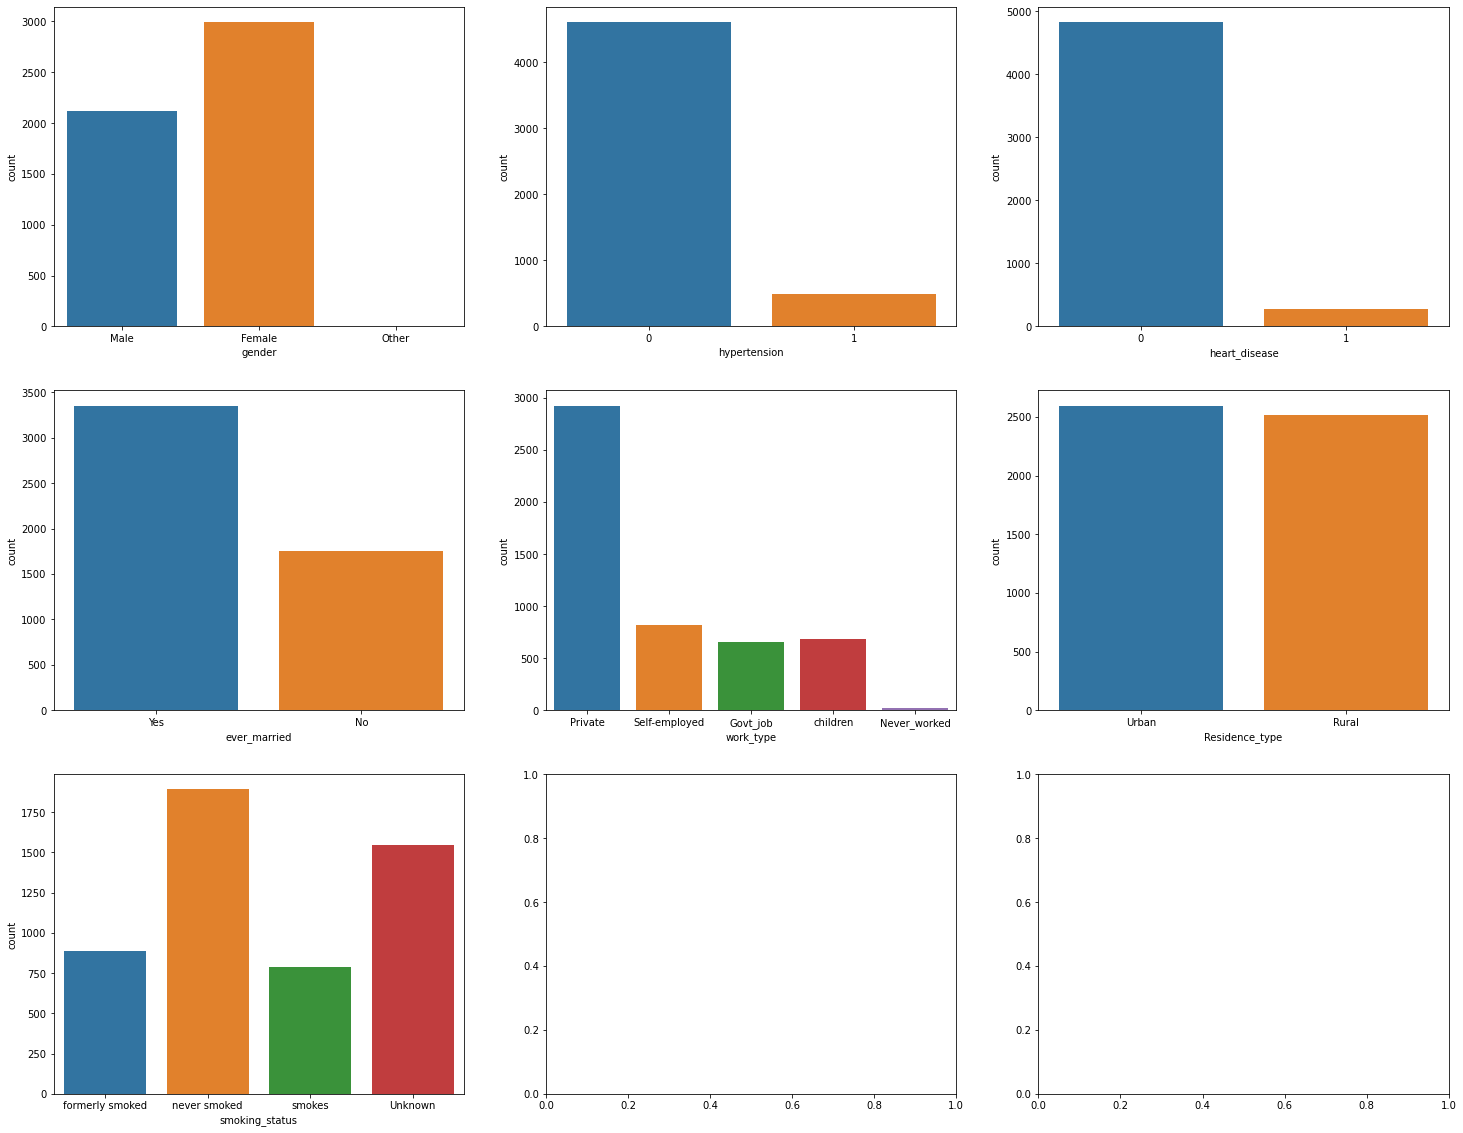

In [15]:
print('The shape before altering : ',dfCategorical.shape)

dfAltered=dfCategorical.drop('stroke',axis=1)

print('The shape after altering : ',dfAltered.shape)


fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize=(25, 20))


for variable,subplot in zip(dfAltered,ax.flatten()):
    
    sns.countplot(dfAltered[variable],ax=subplot)

Conclusions :-
    
1. In gender column the count of gender='other' is too low. So we can remove that category.

2. There is unbalance in data in columns 'heart_disease' and 'hypertension'.

3. We can combine the categories in work_type that is 'private' can be combined with 'self-employed' and 'Never_worked' can be combined with 'children'.

4. The category 'Unknown' is actually missing value we need to treat it by comparing with other categories.

# Target variable

In [16]:
dfCategorical.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stroke', ylabel='count'>

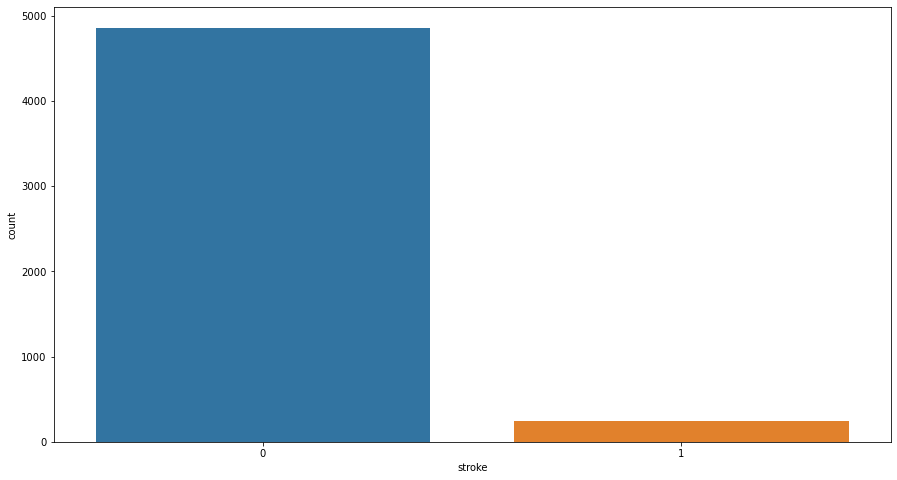

In [17]:
# ploting the count plot for target variable

sns.countplot(dfCategorical.stroke)

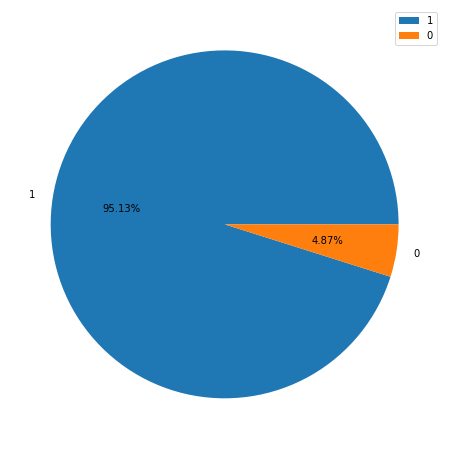

In [18]:
# percentage of data

plt.pie(dfCategorical.stroke.value_counts(),labels=dfCategorical.stroke.unique(),autopct='%.2f%%')
plt.legend()
plt.show()

Conclusion :- A particular class is dominating in the Target variable. We can find in balance in data in target variable.

In [19]:
# treating values in column 'gender'

dfCategorical.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [20]:
# droping the row in gender column where gender =other

dfCategorical.drop(dfCategorical[dfCategorical.gender == 'Other'].index,axis=0,inplace=True)

# value counts after droping

dfCategorical.gender.value_counts()

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Female    2994
Male      2115
Name: gender, dtype: int64

In [21]:
# treating the values in 'work_type' 

print('The value count before treating : ')
print(dfCategorical.work_type.value_counts())

# combining the values

dfCategorical.work_type.replace({'Self-employed':'Private','children':'Never_worked'},inplace=True)

print('The value count after treating  :')
print(dfCategorical.work_type.value_counts())

The value count before treating : 
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
The value count after treating  :
Private         3743
Never_worked     709
Govt_job         657
Name: work_type, dtype: int64


C:\Users\HP\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [22]:
# getting value count of smoking status
dfCategorical.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

In [23]:
# getting records which has smoking status = Unknown
dfCategorical[dfCategorical['smoking_status']== 'Unknown']

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
8,Female,0,0,Yes,Private,Rural,Unknown,1
9,Female,0,0,Yes,Private,Urban,Unknown,1
13,Male,0,1,Yes,Private,Urban,Unknown,1
19,Male,0,1,No,Govt_job,Urban,Unknown,1
23,Male,0,1,Yes,Private,Rural,Unknown,1
27,Male,0,0,Yes,Private,Rural,Unknown,1
31,Male,0,0,Yes,Private,Rural,Unknown,1
38,Male,0,0,No,Private,Rural,Unknown,1
46,Female,0,1,No,Private,Urban,Unknown,1
50,Female,0,0,No,Private,Urban,Unknown,1


 Developing a logestic model for updating values in smoking_status

In [24]:
# checking the value count of each categorical items
for i in dfCategorical.columns:
    print(dfCategorical[i].value_counts())

Female    2994
Male      2115
Name: gender, dtype: int64
0    4611
1     498
Name: hypertension, dtype: int64
0    4833
1     276
Name: heart_disease, dtype: int64
Yes    3353
No     1756
Name: ever_married, dtype: int64
Private         3743
Never_worked     709
Govt_job         657
Name: work_type, dtype: int64
Urban    2596
Rural    2513
Name: Residence_type, dtype: int64
never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64
0    4860
1     249
Name: stroke, dtype: int64


In [25]:
# converting the catgorical values to numeric

for i in dfCategorical.columns:
    for key in range(len(dfCategorical[i].unique()) ):
        print('the element replaced : ',dfCategorical[i].unique()[key],'with : ',key)
        if type(dfCategorical[i].unique()[key]) == str:
            dfCategorical.replace(dfCategorical[i].unique()[key],key,inplace=True)

the element replaced :  Male with :  0
the element replaced :  Female with :  1
the element replaced :  0 with :  0
the element replaced :  1 with :  1
the element replaced :  1 with :  0
the element replaced :  0 with :  1
the element replaced :  Yes with :  0
the element replaced :  No with :  1
the element replaced :  Private with :  0
the element replaced :  Govt_job with :  1
the element replaced :  Never_worked with :  2
the element replaced :  Urban with :  0
the element replaced :  Rural with :  1
the element replaced :  formerly smoked with :  0
the element replaced :  never smoked with :  1
the element replaced :  smokes with :  2
the element replaced :  Unknown with :  3
the element replaced :  1 with :  0
the element replaced :  0 with :  1


C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [26]:
# combining the numeric data and categorical data

dfCombined=pd.concat([dfNumeric,dfCategorical],axis=1)
dfCombined.head()

,age,avg_glucose_level,bmi,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
0,67.0,228.69,36.60,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,61.0,202.21,30.19,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2,80.0,105.92,32.50,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
3,49.0,171.23,34.40,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
4,79.0,174.12,24.00,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0


In [27]:
# getting all the records who's smoking_status is not 'Unknown'

dfFiltered=dfCombined[dfCombined['smoking_status']!= 3]

dfFiltered.head()

,age,avg_glucose_level,bmi,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
0,67.0,228.69,36.60,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,61.0,202.21,30.19,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2,80.0,105.92,32.50,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
3,49.0,171.23,34.40,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
4,79.0,174.12,24.00,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0


In [28]:
# getting only the record which has smoking status ='Unknown'
dfUnknown=dfCombined[dfCombined['smoking_status']== 3]
dfUnknown.head()

,age,avg_glucose_level,bmi,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
8,59.0,76.15,31.192000,1.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0
9,78.0,58.57,24.200000,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0
13,78.0,219.84,27.929032,0.0,0.0,1.0,0.0,0.0,0.0,3.0,1.0
19,57.0,217.08,32.182796,0.0,0.0,1.0,1.0,1.0,0.0,3.0,1.0
23,82.0,208.30,32.500000,0.0,0.0,1.0,0.0,0.0,1.0,3.0,1.0


In [29]:
# getting an untreated null value record

dfFiltered[dfFiltered.gender.isnull()]

,age,avg_glucose_level,bmi,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
3116,26.0,143.33,22.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# removing the record
dfFiltered.drop([3116],axis=0,inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [31]:
# rechecking if there is any null value
dfFiltered[dfFiltered.gender.isnull()]

,age,avg_glucose_level,bmi,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke


# Building a logistic model to update the smoking status ="unknown"

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [33]:
# spliting records

X=dfFiltered.drop(['smoking_status','stroke'],axis=1) 

Y=dfFiltered['smoking_status']

print('The X-shape : ',X.shape,'The Y-shape',Y.shape)

The X-shape :  (3565, 9) The Y-shape (3565,)


In [34]:
# spliting for test data and train data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [35]:
# model fiting

LRModel=LogisticRegression(multi_class='multinomial')

LRModel.fit(X_train,Y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [36]:
# preparing new test data for prediction
dfUnknown.drop(['smoking_status','stroke'],axis=1,inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [37]:
# using the model to 
testPredictions=LRModel.predict(dfUnknown)

In [38]:
dfCombined[dfCombined['smoking_status']== 3].shape

(1544, 11)

In [39]:
# value count before updating

dfCombined.smoking_status.value_counts()

1.0    1892
3.0    1544
0.0     884
2.0     789
Name: smoking_status, dtype: int64

In [40]:
# updating the unknown value with values in prediction
dfCombined.loc[dfCombined[dfCombined['smoking_status']== 3].index,'smoking_status']=testPredictions

In [41]:
# checking the value count after updating 
dfCombined.smoking_status.value_counts()

1.0    3373
0.0     942
2.0     794
Name: smoking_status, dtype: int64